In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as mtrans
import numpy as np
from scipy.stats import gaussian_kde

import warnings
warnings.filterwarnings("ignore")

## Import results

In [2]:
import pickle 

FILE_PATH = "dict_gibbs_simulations.pkl"

def save_dictionary(dict_, FILE_PATH):
    with open(FILE_PATH, 'wb') as f:
        pickle.dump(dict_, f)

def load_dictionary(FILE_PATH):
    with open(FILE_PATH, 'rb') as f:
        loaded_dict = pickle.load(f)
    return loaded_dict

In [3]:
dict_results = load_dictionary(FILE_PATH)

In [4]:
for key in dict_results.keys():
    print(key, len(dict_results[key]))

0.02, 5 132
0.02, 10 126
0.02, 100 120
0.25, 5 158
0.25, 10 149
0.25, 100 141
0.5, 5 201
0.5, 10 194
0.5, 100 184


## Histograms

In [10]:
def values_from_key(key):
    key = key.replace(" ", "")
    key = key.split(',')
    Ry = float(key[0])
    s = int(key[1])
    return Ry, s

def get_last_qs(key, value, dict_results=dict_results):
    res = dict_results[key]
    qs = []
    for r in res:
        params, beta = r
        qs.append(params[value][-1])
    return qs

def get_median_qs(key, value, dict_results=dict_results):
    res = dict_results[key]
    medians = []
    for r in res:
        params, beta = r
        median = np.median(params[value])
        medians.append(median)
    return medians

def get_qs_random(key, value, dict_results=dict_results):
    res = dict_results[key]
    index = np.random.choice(range(len(res)))
    params, beta = res[index]
    return params[value]

In [18]:
def plot_histograms(method, title, bins=None):
    fig, axs = plt.subplots(3, 3, figsize=(18, 12))
    for i, key in enumerate(dict_results.keys()):
        Ry, s = values_from_key(key)
        qs = method(key, 'q')
        r2s = method(key, 'r2')
        if bins is None:
            bins = int(1 + np.log2(len(qs)))
            
        axs[i//3][i%3].hist(qs, bins=bins, color='#86bf91', edgecolor='black', alpha=0.7, density=True, label="histogram of q")
        axs[i//3][i%3].hist(r2s, bins=bins, color='#9177bf', edgecolor='black', alpha=0.7, density=True, label="histogram of R²")
        axs[i//3][i%3].set_xlim([-0.1, 1.1])
        axs[i//3][i%3].grid(axis='y', linestyle='--', alpha=0.7)


        # Use gaussian_kde to estimate the kernel density
        kde = gaussian_kde(qs)
        x_values = np.linspace(np.min(qs), np.max(qs), 1000)
        axs[i//3][i%3].plot(x_values, kde(x_values), color='blue', label='KDE')

        if i // 3 == 0:
            axs[i//3][i%3].set_title(f"s = {s}\n", fontsize=18)
        if i % 3 == 0:
            axs[i//3][i%3].set_ylabel(f"Ry = {Ry}", rotation=0, ha='right', fontsize=18)
            
    handles, labels = axs[0][0].get_legend_handles_labels()
    legend_properties = {'weight': 'bold', 'size': 'large'}
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0),
           fancybox=True, shadow=True, ncol=3, prop=legend_properties)

    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.05)

     # Get the bounding boxes of the axes including text decorations
    r = fig.canvas.get_renderer()
    get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
    bboxes = np.array(list(map(get_bbox, axs.flat)), mtrans.Bbox).reshape(axs.shape)

    ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axs.shape).max(axis=1)
    ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axs.shape).min(axis=1)
    ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

    for y in ys:
        line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black")
        fig.add_artist(line)

    plt.show()

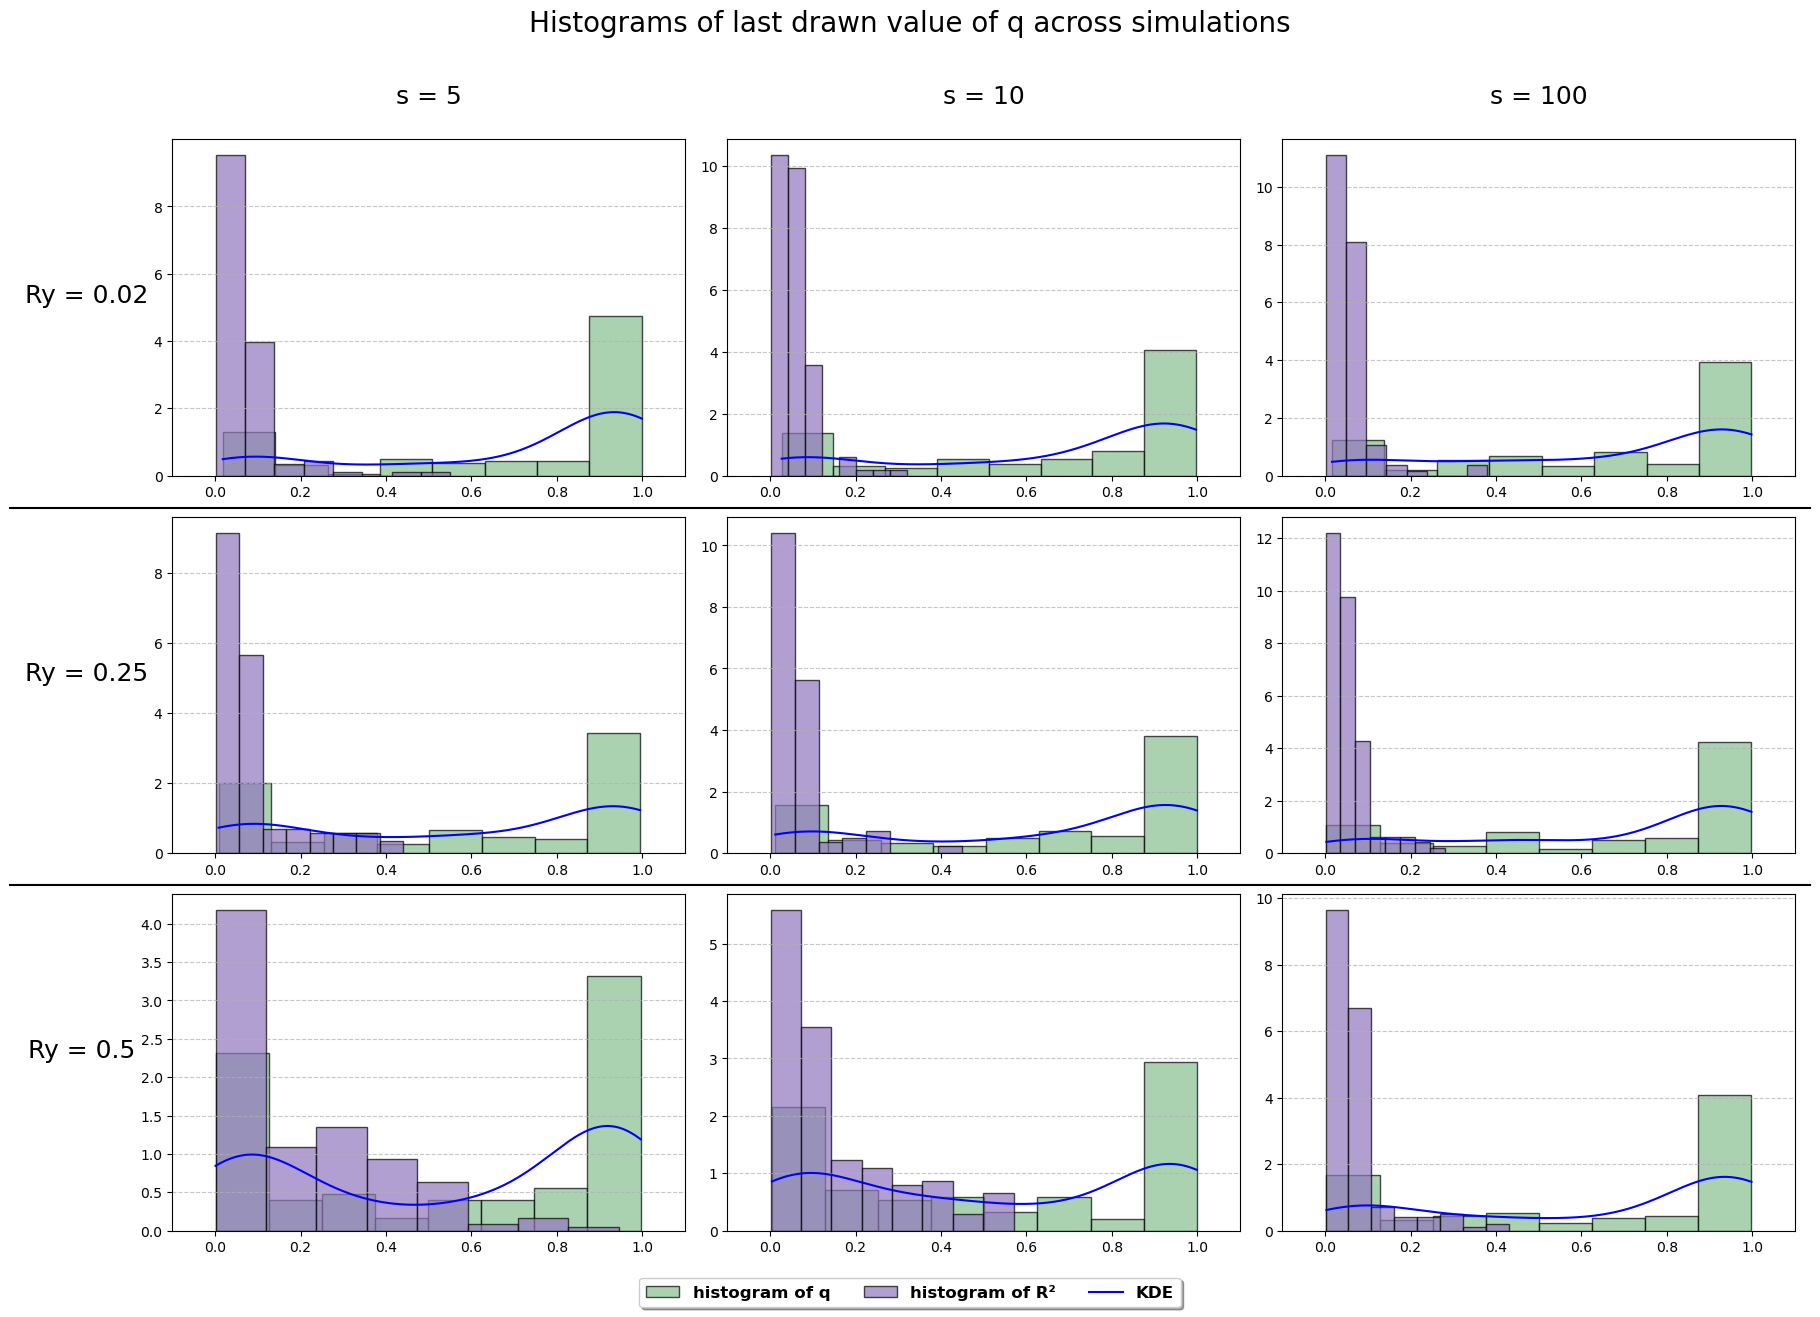

In [15]:
plot_histograms(get_last_qs, "Histograms of last drawn value of q across simulations")

### Q) 2.(a)
For each data set, compute the posterior median of q and plot an histogram (or kernel) approximation of the distribution of the posterior median of q across the 100 data sets.

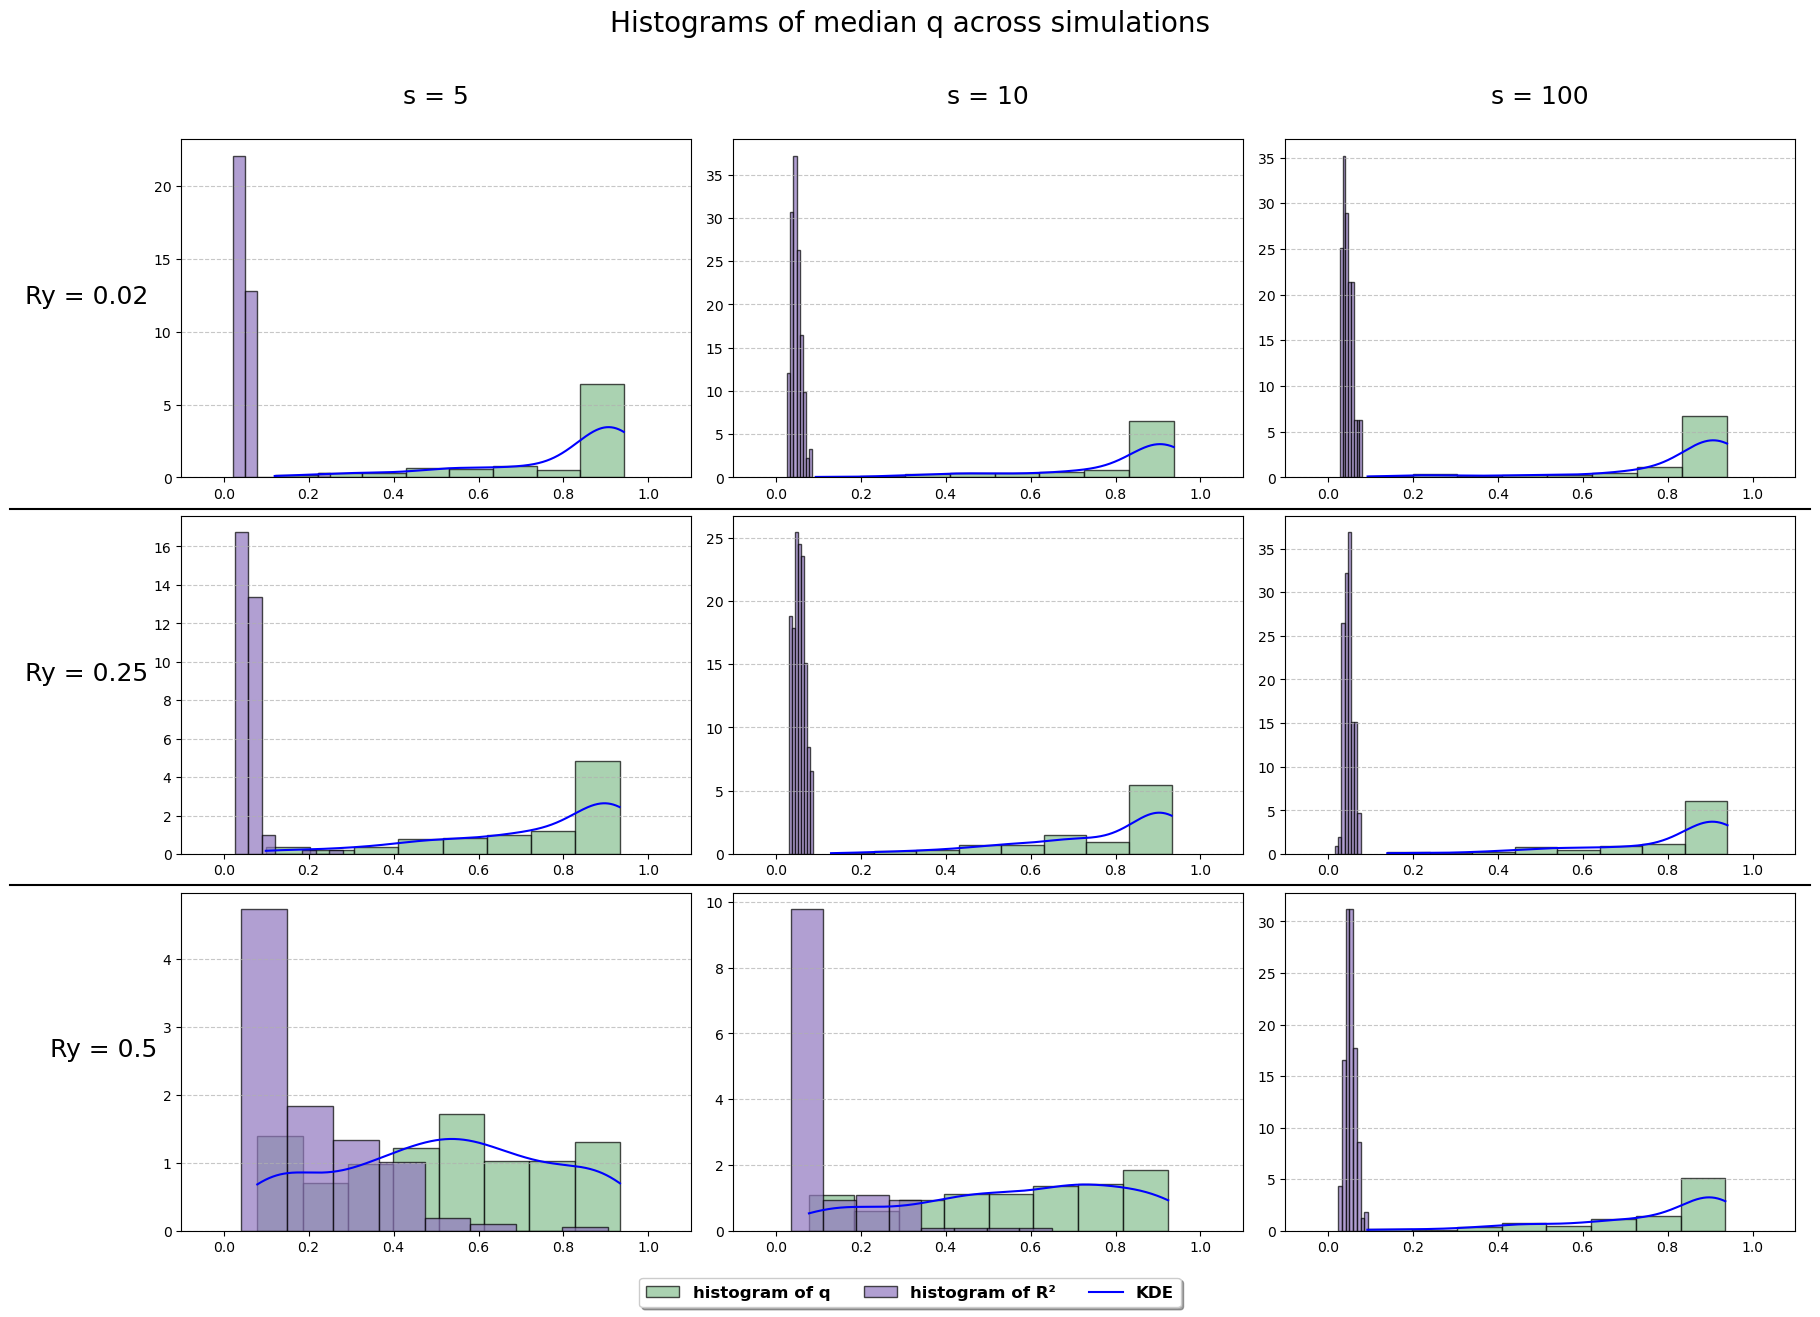

In [16]:
plot_histograms(get_median_qs, "Histograms of median q across simulations")

### Q) 2.(b)
For one data set, plot the marginal posterior distribution of q

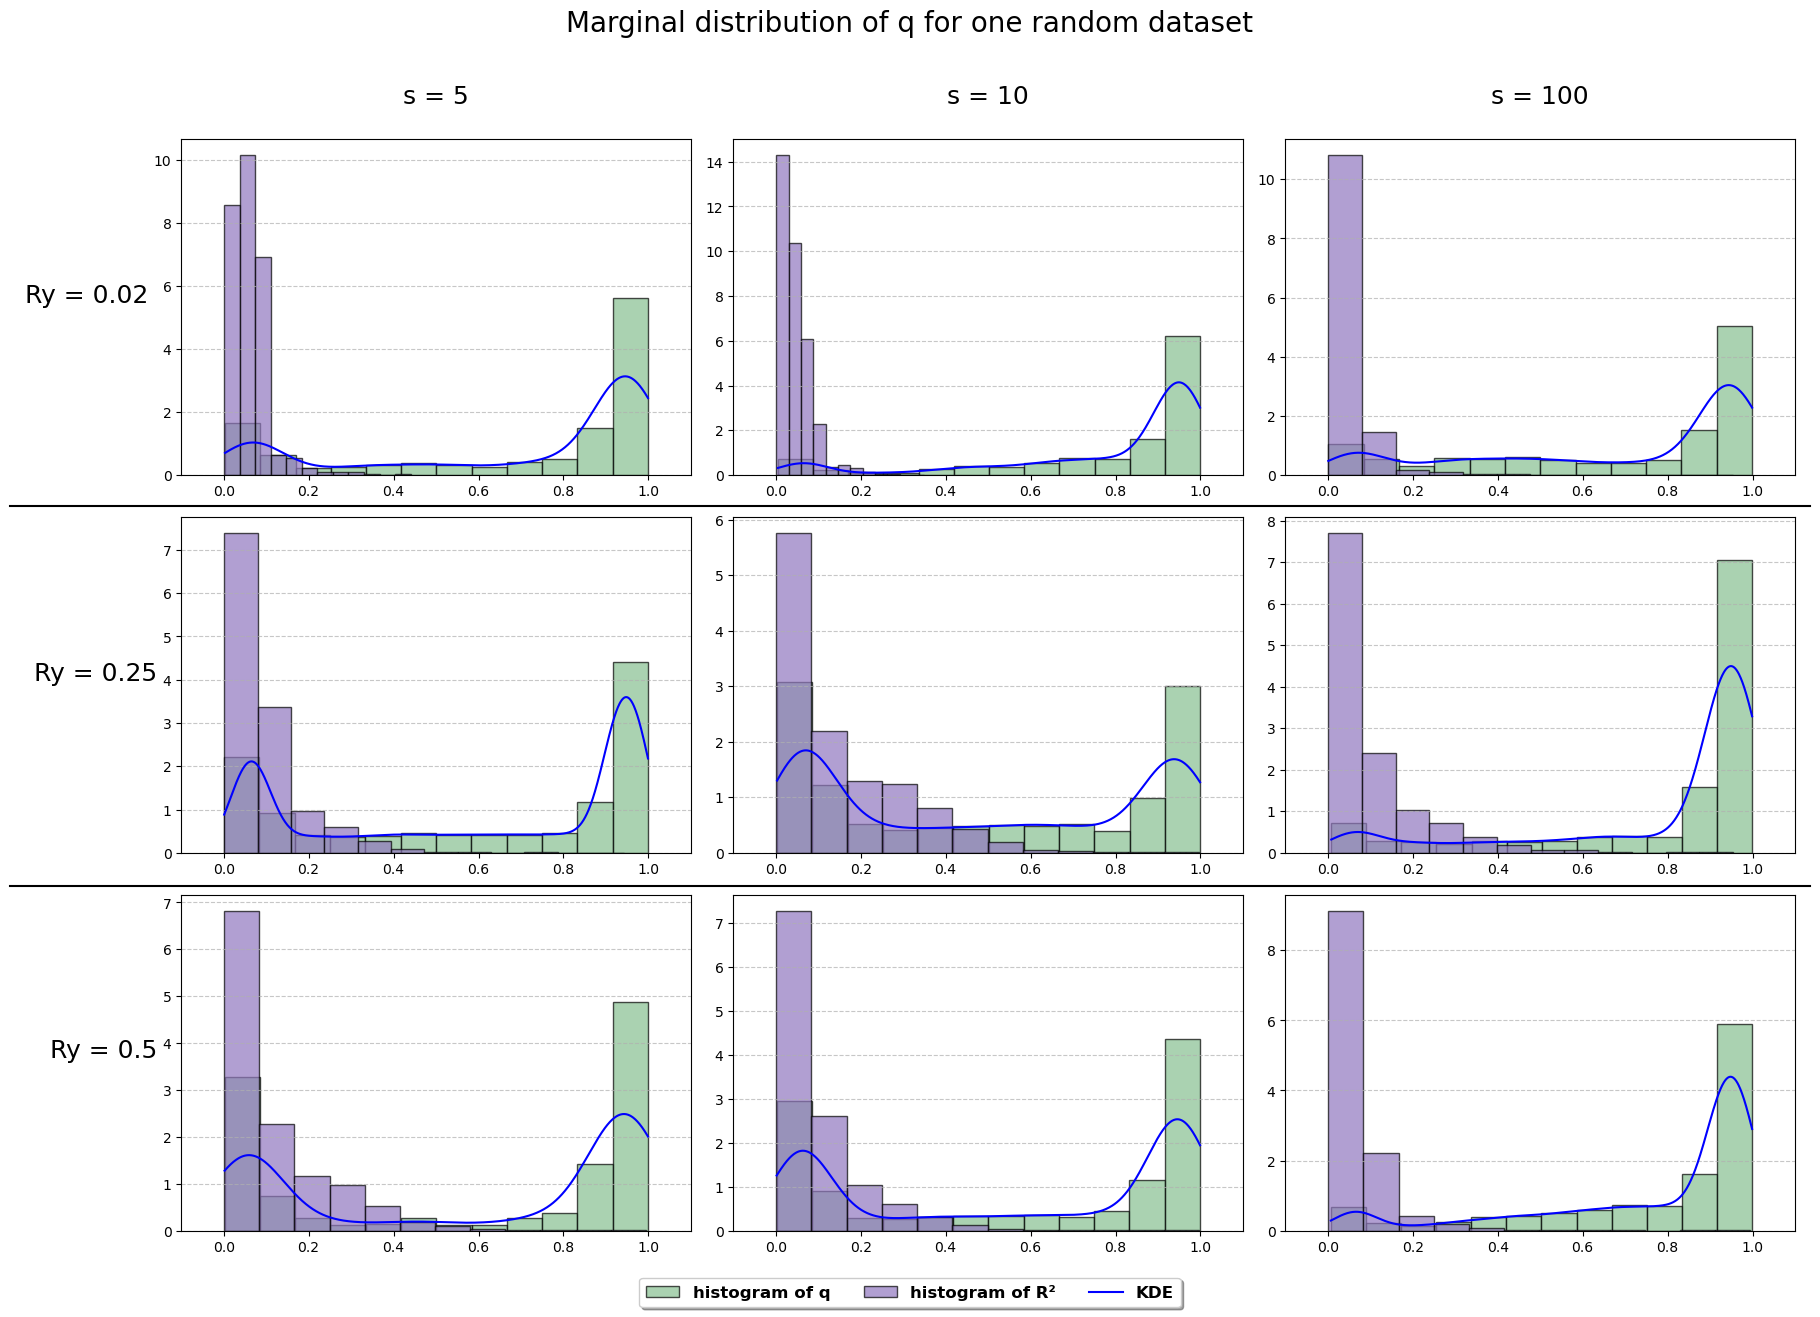

In [17]:
plot_histograms(get_qs_random, "Marginal distribution of q for one random dataset")